# How To Minimize Churn

        -By Jessica Gardin

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import env 
import acquire
import prepare


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

# Data Wrangling

## Acquire

<b>Requires:<b>
- env.user
- env.password
- env.host


<b>acquire.get_telco_data()<b>

   - Function gets telco_data first from save file inside folder, then, if no file exits, it will pull directly from mysql. 

<b>acquire.new_telco_data()<b>

   - pulls data from mysql


# Prep Telco

- drop all 'id' columns
- created dummy columns for:
    - contract
    - internet
    - payment
- dropped brand new customers who had no total payment values as they were too new
- converted total charges to 'float' type
- encoded binary catagory for:
    - gender
    - partner
    - dependents
    - phone services
    - multiple_lines
    - online_security
    - online_backup
    - device_protection
    - tech_support
    - streaming_tv
    - streaming_movies
    - paperless builing
    - churn
    

## Split Telco

<b>train, validate, test = prepare.split_telco_data()<b>

- 20% of data into test group
- 30% of remaining data into validate group (30% of 80% = 24% of total data)
- 70% of remaining data into train group (70% of 80% = 56% of total data)

    
<b>target leakage<b>
    
  - data is further split to avoid target leakage
    
    x_train = train.drop(columns=['churn']) \
    y_train = train.churn

    x_validate = validate.drop(columns=['churn']) \
    y_validate = validate.churn

    x_test = test.drop(columns=['churn']) \
    y_test = test.churn

# Data Wrangling in Action

In [4]:
df = acquire.get_telco_data()

In [5]:
df.shape

(7043, 24)

In [6]:
df = prepare.prep_telco(df)

In [7]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,multiple_lines_encoded,online_security_encoded,online_backup_encoded,device_protection_encoded,tech_support_encoded,streaming_tv_encoded,streaming_movies_encoded,paperless_billing_encoded,churn_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,One year,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,Month-to-month,DSL,Mailed check,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Month-to-month,Fiber optic,Mailed check,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1


In [8]:
train, validate, test = prepare.split_telco_data(df)

In [9]:
df.shape, train.shape, validate.shape, test.shape

((7032, 42), (3937, 42), (1688, 42), (1407, 42))

In [10]:
# no data leakage
x_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

x_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

x_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

# Exploration

In [11]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,multiple_lines_encoded,online_security_encoded,online_backup_encoded,device_protection_encoded,tech_support_encoded,streaming_tv_encoded,streaming_movies_encoded,paperless_billing_encoded,churn_encoded
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,One year,DSL,Mailed check,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,Month-to-month,DSL,Mailed check,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Month-to-month,Fiber optic,Electronic check,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Month-to-month,Fiber optic,Mailed check,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1


In [12]:
c_pay_type = pd.crosstab(df.payment_type, df.churn_encoded, normalize = 'index')
c_tech_sup = pd.crosstab(df.tech_support, df.churn_encoded, normalize = 'index')
c_Int_serv = pd.crosstab(df.internet_service_type, df.churn_encoded, normalize = 'index')
c_Cont = pd.crosstab(df.contract_type, df.churn_encoded, normalize = 'index')
c_strm_tv = pd.crosstab(df.streaming_tv, df.churn_encoded, normalize = 'index')
c_sen_cit = pd.crosstab(df.senior_citizen, df.churn_encoded, normalize = 'index')
c_partn = pd.crosstab(df.partner, df.churn_encoded, normalize = 'index')
c_dependents = pd.crosstab(df.dependents, df.churn_encoded, normalize = 'index')

In [13]:
c_sen_cit.index = ['No', 'Yes'] 
c_strm_tv.index = ['No', 'Yes', 'No internet']
c_tech_sup.index = ['No', 'Yes', 'No internet']


In [14]:
melt_pay_type = pd.melt(c_pay_type, ignore_index=False,value_vars = [0, 1])
melt_tech_sup = pd.melt(c_tech_sup, ignore_index=False,value_vars = [0, 1])
melt_Int_serv = pd.melt(c_Int_serv, ignore_index=False,value_vars = [0, 1])
melt_Cont = pd.melt(c_Cont, ignore_index=False,value_vars = [0, 1])
melt_strm_tv = pd.melt(c_strm_tv, ignore_index=False,value_vars = [0, 1])
melt_sen_cit = pd.melt(c_sen_cit, ignore_index=False,value_vars = [0, 1])
melt_partn = pd.melt(c_partn, ignore_index=False,value_vars = [0, 1])
melt_dependents = pd.melt(c_dependents, ignore_index=False,value_vars = [0, 1])

In [15]:
melt_sen_cit.index.names=['senior']
melt_strm_tv.index.names=['strm_tv']
melt_tech_sup.index.names=['tech_sup']

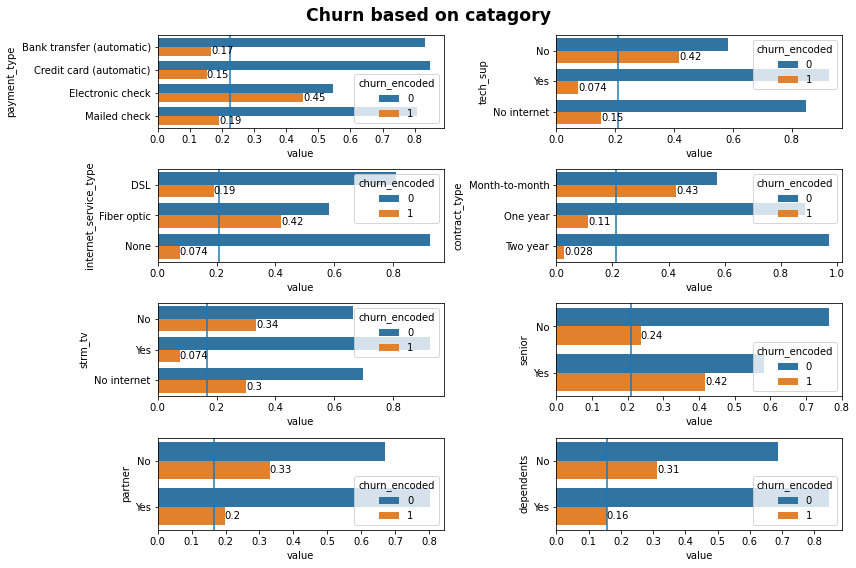

In [16]:
#have to use seaborn or it wont work

k = plt.figure(figsize= (12,8))
plt.suptitle('Churn based on catagory', fontsize = 'xx-large', weight = 1000)

plt.subplot(421)
aa=sns.barplot(data = melt_pay_type, y = melt_pay_type.index, x= 'value', hue = 'churn_encoded')
aa.bar_label(aa.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_pay_type[melt_pay_type.churn_encoded == 1].value.max()))

plt.subplot(422)
ab=sns.barplot(data = melt_tech_sup, y = melt_tech_sup.index, x= 'value', hue = 'churn_encoded')
ab.bar_label(ab.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_tech_sup[melt_tech_sup.churn_encoded == 1].value.max()))

plt.subplot(423)
ac=sns.barplot(data = melt_Int_serv, y = melt_Int_serv.index, x= 'value', hue = 'churn_encoded')
ac.bar_label(ac.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Int_serv[melt_Int_serv.churn_encoded == 1].value.max()))

plt.subplot(424)
ad=sns.barplot(data = melt_Cont, y = melt_Cont.index, x= 'value', hue = 'churn_encoded')
ad.bar_label(ad.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Cont[melt_Cont.churn_encoded == 1].value.max()))

plt.subplot(425)
ae=sns.barplot(data = melt_strm_tv, y = melt_strm_tv.index, x= 'value', hue = 'churn_encoded')
ae.bar_label(ae.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_strm_tv[melt_strm_tv.churn_encoded == 1].value.max()))

plt.subplot(426)
af=sns.barplot(data = melt_sen_cit, y = melt_sen_cit.index, x= 'value', hue = 'churn_encoded')
af.bar_label(af.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_sen_cit[melt_sen_cit.churn_encoded == 1].value.max()))

plt.subplot(427)
ag=sns.barplot(data = melt_partn, y = melt_partn.index, x= 'value', hue = 'churn_encoded')
ag.bar_label(ag.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_partn[melt_partn.churn_encoded == 1].value.max()))

plt.subplot(428)
ah=sns.barplot(data = melt_dependents, y = melt_dependents.index, x= 'value', hue = 'churn_encoded')
ah.bar_label(ah.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_dependents[melt_dependents.churn_encoded == 1].value.max()))

plt.tight_layout()

In [17]:
c_pay_type = pd.crosstab(df.dependents, df.churn_encoded, normalize = 'index')
c_tech_sup = pd.crosstab(df.online_backup, df.churn_encoded, normalize = 'index')
c_Int_serv = pd.crosstab(df.device_protection, df.churn_encoded, normalize = 'index')
c_Cont = pd.crosstab(df.multiple_lines, df.churn_encoded, normalize = 'index')
c_strm_tv = pd.crosstab(df.gender, df.churn_encoded, normalize = 'index')
c_sen_cit = pd.crosstab(df.streaming_movies, df.churn_encoded, normalize = 'index')
c_partn = pd.crosstab(df.phone_service, df.churn_encoded, normalize = 'index')
c_dependents = pd.crosstab(df.paperless_billing, df.churn_encoded, normalize = 'index')

In [18]:
melt_pay_type = pd.melt(c_pay_type, ignore_index=False,value_vars = [0, 1])
melt_tech_sup = pd.melt(c_tech_sup, ignore_index=False,value_vars = [0, 1])
melt_Int_serv = pd.melt(c_Int_serv, ignore_index=False,value_vars = [0, 1])
melt_Cont = pd.melt(c_Cont, ignore_index=False,value_vars = [0, 1])
melt_strm_tv = pd.melt(c_strm_tv, ignore_index=False,value_vars = [0, 1])
melt_sen_cit = pd.melt(c_sen_cit, ignore_index=False,value_vars = [0, 1])
melt_partn = pd.melt(c_partn, ignore_index=False,value_vars = [0, 1])
melt_dependents = pd.melt(c_dependents, ignore_index=False,value_vars = [0, 1])

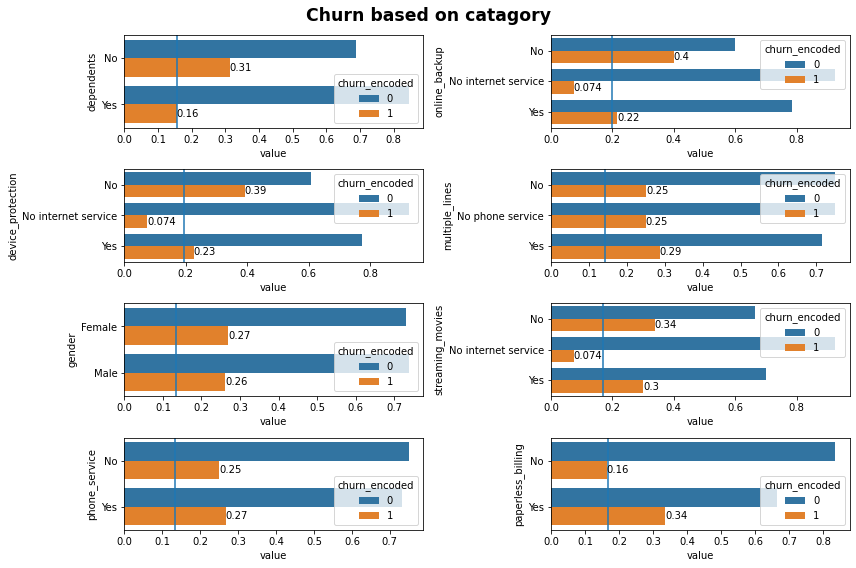

In [19]:
l = plt.figure(figsize= (12,8))
plt.suptitle('Churn based on catagory', fontsize = 'xx-large', weight = 1000)

plt.subplot(421)
aa=sns.barplot(data = melt_pay_type, y = melt_pay_type.index, x= 'value', hue = 'churn_encoded')
aa.bar_label(aa.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_pay_type[melt_pay_type.churn_encoded == 1].value.max()))

plt.subplot(422)
ab=sns.barplot(data = melt_tech_sup, y = melt_tech_sup.index, x= 'value', hue = 'churn_encoded')
ab.bar_label(ab.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_tech_sup[melt_tech_sup.churn_encoded == 1].value.max()))

plt.subplot(423)
ac=sns.barplot(data = melt_Int_serv, y = melt_Int_serv.index, x= 'value', hue = 'churn_encoded')
ac.bar_label(ac.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Int_serv[melt_Int_serv.churn_encoded == 1].value.max()))

plt.subplot(424)
ad=sns.barplot(data = melt_Cont, y = melt_Cont.index, x= 'value', hue = 'churn_encoded')
ad.bar_label(ad.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_Cont[melt_Cont.churn_encoded == 1].value.max()))

plt.subplot(425)
ae=sns.barplot(data = melt_strm_tv, y = melt_strm_tv.index, x= 'value', hue = 'churn_encoded')
ae.bar_label(ae.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_strm_tv[melt_strm_tv.churn_encoded == 1].value.max()))

plt.subplot(426)
af=sns.barplot(data = melt_sen_cit, y = melt_sen_cit.index, x= 'value', hue = 'churn_encoded')
af.bar_label(af.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_sen_cit[melt_sen_cit.churn_encoded == 1].value.max()))

plt.subplot(427)
ag=sns.barplot(data = melt_partn, y = melt_partn.index, x= 'value', hue = 'churn_encoded')
ag.bar_label(ag.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_partn[melt_partn.churn_encoded == 1].value.max()))

plt.subplot(428)
ah=sns.barplot(data = melt_dependents, y = melt_dependents.index, x= 'value', hue = 'churn_encoded')
ah.bar_label(ah.containers[1], fmt = '%.2g')
plt.axvline(x=0.5*(melt_dependents[melt_dependents.churn_encoded == 1].value.max()))

plt.tight_layout()

Explore Conclusion:

catagories where 40% or more of that group churned:
- Electronic checking
- Fiber Optic
- Senior
- Month-to-month
- No Tech support


# Predicting Churn

In [25]:
df = acquire.get_telco_data()

In [29]:
df = prepare.prep_telco(df)

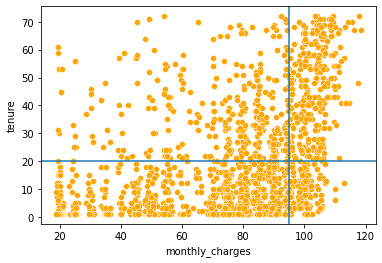

In [33]:
sns.scatterplot(data = df[df.churn_encoded == 1], x =  'monthly_charges', y = 'tenure', color='orange')
#np.polyfit(x =  'monthly_charges', y = 'tenure', 2)
plt.axvline(x=95)
plt.axhline(y=20)

In [34]:
q = df[df.churn_encoded == 1]

In [37]:
q = q[q['contract_type_Month-to-month'] == 1]

In [39]:
q = q[['contract_type_Month-to-month', 'tenure']]

In [40]:
q.tenure = q.tenure.round(0)

In [42]:
l = q.groupby('tenure').count().head(25)

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

<Figure size 1440x576 with 0 Axes>

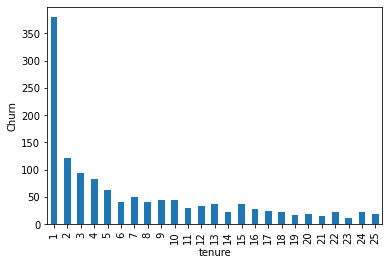

In [44]:
plt.figure(figsize = (20, 8))
l.plot(kind = 'bar', legend =False, ylabel = 'Churn')